In [14]:
# Import Pandas as Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


# Extraction, Transformation, Loading (ETL)

In [16]:
# Read the post covid file and store into Pandas DataFrame
food_access_raw_df = pd.read_csv("FoodAccessResearchAtlasData2019.csv", dtype={'CensusTract': str})
food_access_raw_df.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,01001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,01001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,01001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,01001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,01001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [3]:
# Get list of columns
list(food_access_raw_df.columns)

['CensusTract',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'GroupQuartersFlag',
 'NUMGQTRS',
 'PCTGQTRS',
 'LILATracts_1And10',
 'LILATracts_halfAnd10',
 'LILATracts_1And20',
 'LILATracts_Vehicle',
 'HUNVFlag',
 'LowIncomeTracts',
 'PovertyRate',
 'MedianFamilyIncome',
 'LA1and10',
 'LAhalfand10',
 'LA1and20',
 'LATracts_half',
 'LATracts1',
 'LATracts10',
 'LATracts20',
 'LATractsVehicle_20',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_10',
 'LALOWI1_20',
 'lapophalf',
 'lapophalfshare',
 'lalowihalf',
 'lalowihalfshare',
 'lakidshalf',
 'lakidshalfshare',
 'laseniorshalf',
 'laseniorshalfshare',
 'lawhitehalf',
 'lawhitehalfshare',
 'lablackhalf',
 'lablackhalfshare',
 'laasianhalf',
 'laasianhalfshare',
 'lanhopihalf',
 'lanhopihalfshare',
 'laaianhalf',
 'laaianhalfshare',
 'laomultirhalf',
 'laomultirhalfshare',
 'lahisphalf',
 'lahisphalfshare',
 'lahunvhalf',
 'lahunvhalfshare',
 'lasnaphalf',
 'lasnaphalfshare',
 'lapop1',
 'lapop1share',
 

In [17]:
# Create a subset dataframe with selected columns
food_access_raw_df = food_access_raw_df[["CensusTract", "State", "County", "Urban", "Pop2010", "OHU2010", "PovertyRate",
                                    "MedianFamilyIncome", "LAhalfand10", "LAPOP1_10", "LAPOP05_10", "LAPOP1_20", "LALOWI1_10",
                                     "LALOWI05_10", "LALOWI1_20", "lapophalfshare", "lalowihalfshare", "lakidshalfshare",
                                     "laseniorshalfshare", "lawhitehalfshare", "lablackhalfshare", "laasianhalfshare",
                                     "lanhopihalfshare", "laaianhalfshare", "laomultirhalfshare", "lahisphalfshare", "lahunvhalfshare", "lasnaphalfshare", "lapop10share", "lalowi10share", 
                                     "lakids10share", "laseniors10share", "lawhite10share", "lablack10share",
                                     "laasian10share", "lanhopi10share", "laaian10share", "laomultir10share", "lahisp10share", "lahunv10share",
                                     "lasnap10share", "TractLOWI", "TractKids", "TractSeniors", "TractWhite",
                                     "TractBlack", "TractAsian", "TractNHOPI", "TractAIAN", "TractOMultir",
                                     "TractHispanic", "TractHUNV", "TractSNAP"]]
food_access_raw_df.tail()


,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,LAPOP1_10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
72526,56043000200,Wyoming,Washakie County,0,3326,1317,9.7,67254.0,1,902.0,...,593.0,3106.0,6.0,15.0,0.0,27.0,172.0,309.0,61.0,64.0
72527,56043000301,Wyoming,Washakie County,1,2665,1154,11.6,64152.0,1,NaN,...,399.0,2377.0,5.0,23.0,0.0,40.0,220.0,446.0,88.0,41.0
72528,56043000302,Wyoming,Washakie County,1,2542,1021,16.3,69605.0,1,155.0,...,516.0,2312.0,11.0,10.0,1.0,26.0,182.0,407.0,23.0,64.0
72529,56045951100,Wyoming,Weston County,0,3314,1322,17.5,74500.0,1,840.0,...,499.0,3179.0,15.0,10.0,1.0,47.0,62.0,91.0,47.0,34.0
72530,56045951300,Wyoming,Weston County,1,3894,1699,17.3,76838.0,1,1376.0,...,650.0,3706.0,6.0,10.0,2.0,44.0,126.0,125.0,34.0,110.0


In [18]:
# Create "StateFIPS" column by slicing "CensusTract" column 
food_access_raw_df["StateFIPS"] = food_access_raw_df["CensusTract"].str.slice(0, 2)
food_access_raw_df.head()


,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,LAPOP1_10,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,StateFIPS
0,01001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,1896.0,...,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0,01
1,01001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,1261.0,...,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0,01
2,01001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,1552.0,...,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0,01
3,01001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,1363.0,...,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0,01
4,01001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,2643.0,...,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0,01


In [19]:
# shift "StateFIPS" column to first position
first_column = food_access_raw_df.pop("StateFIPS")
  
# insert column using insert(position,column_name,first_column) function
food_access_raw_df.insert(0, "StateFIPS", first_column)

# Display Dataframe
food_access_raw_df.head()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,01,01001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,01,01001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,01,01001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,01,01001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,01,01001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [20]:
# Get dataframe information
food_access_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StateFIPS           72531 non-null  object 
 1   CensusTract         72531 non-null  object 
 2   State               72531 non-null  object 
 3   County              72531 non-null  object 
 4   Urban               72531 non-null  int64  
 5   Pop2010             72531 non-null  int64  
 6   OHU2010             72531 non-null  int64  
 7   PovertyRate         72528 non-null  float64
 8   MedianFamilyIncome  71783 non-null  float64
 9   LAhalfand10         72531 non-null  int64  
 10  LAPOP1_10           42574 non-null  float64
 11  LAPOP05_10          57991 non-null  float64
 12  LAPOP1_20           36617 non-null  float64
 13  LALOWI1_10          42574 non-null  float64
 14  LALOWI05_10         57991 non-null  float64
 15  LALOWI1_20          36617 non-null  float64
 16  lapo

In [21]:
# Calculate percentage population of each group
food_access_raw_df[["TractLOWI_PCT", "TractKids_PCT", "TractSeniors_PCT", "TractWhite_PCT",
                "TractBlack_PCT", "TractAsian_PCT", "TractNHOPI_PCT", "TractAIAN_PCT",
                "TractOMultir_PCT", "TractHispanic_PCT"]] = food_access_raw_df[["TractLOWI", "TractKids", "TractSeniors", "TractWhite",
                                     "TractBlack", "TractAsian", "TractNHOPI", "TractAIAN", "TractOMultir",
                                     "TractHispanic"]]\
    .apply(lambda x: x/food_access_raw_df['Pop2010']*100).round(2)


# Display Dataframe
food_access_raw_df.head()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractLOWI_PCT,TractKids_PCT,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT
0,01,01001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,...,23.80,26.52,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30
1,01,01001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,...,36.96,27.93,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46
2,01,01001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,...,38.72,26.50,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58
3,01,01001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,...,21.02,23.14,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94
4,01,01001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,...,20.82,29.37,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30


In [22]:
# Calculate percentage TractHUNV and TractSNAP  group
food_access_raw_df[["TractHUNV_PCT", "TractSNAP_PCT"]] = food_access_raw_df[["TractHUNV", "TractSNAP"]]\
    .apply(lambda x: x/food_access_raw_df['OHU2010']*100).round(2)


# Display Dataframe
food_access_raw_df.head()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,01,01001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,...,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72
1,01,01001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,...,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00
2,01,01001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,...,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69
3,01,01001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,...,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69
4,01,01001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,...,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30


In [23]:
# # Get dataframe information
food_access_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StateFIPS           72531 non-null  object 
 1   CensusTract         72531 non-null  object 
 2   State               72531 non-null  object 
 3   County              72531 non-null  object 
 4   Urban               72531 non-null  int64  
 5   Pop2010             72531 non-null  int64  
 6   OHU2010             72531 non-null  int64  
 7   PovertyRate         72528 non-null  float64
 8   MedianFamilyIncome  71783 non-null  float64
 9   LAhalfand10         72531 non-null  int64  
 10  LAPOP1_10           42574 non-null  float64
 11  LAPOP05_10          57991 non-null  float64
 12  LAPOP1_20           36617 non-null  float64
 13  LALOWI1_10          42574 non-null  float64
 14  LALOWI05_10         57991 non-null  float64
 15  LALOWI1_20          36617 non-null  float64
 16  lapo

In [25]:
food_access_raw_df.isnull().sum().tail(60)

OHU2010                   0
PovertyRate               3
MedianFamilyIncome      748
LAhalfand10               0
LAPOP1_10             29957
LAPOP05_10            14540
LAPOP1_20             35914
LALOWI1_10            29957
LALOWI05_10           14540
LALOWI1_20            35914
lapophalfshare         4568
lalowihalfshare        4568
lakidshalfshare        4568
laseniorshalfshare     4568
lawhitehalfshare       4568
lablackhalfshare       4568
laasianhalfshare       4568
lanhopihalfshare       4568
laaianhalfshare        4568
laomultirhalfshare     4568
lahisphalfshare        4568
lahunvhalfshare        4562
lasnaphalfshare        4562
lapop10share          64765
lalowi10share         64765
lakids10share         64765
laseniors10share      64765
lawhite10share        64765
lablack10share        64765
laasian10share        64765
lanhopi10share        64765
laaian10share         64765
laomultir10share      64765
lahisp10share         64765
lahunv10share         64666
lasnap10share       

# DataFrame with First Option Columns (71,782 rows)

In [11]:
# Create a subset dataframe with selected columns
first_food_access_df = food_access_raw_df[["StateFIPS", "CensusTract", "State", "County", "Urban", "Pop2010", "OHU2010", "PovertyRate",
                                    "MedianFamilyIncome", "LAhalfand10", "TractLOWI", "TractKids", "TractSeniors", "TractWhite",
                                     "TractBlack", "TractAsian", "TractNHOPI", "TractAIAN", "TractOMultir",
                                     "TractHispanic", "TractHUNV", "TractSNAP", "TractLOWI_PCT", "TractKids_PCT", "TractSeniors_PCT", "TractWhite_PCT",
                "TractBlack_PCT", "TractAsian_PCT", "TractNHOPI_PCT", "TractAIAN_PCT",
                "TractOMultir_PCT", "TractHispanic_PCT", "TractHUNV_PCT", "TractSNAP_PCT"]]
first_food_access_df.tail()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
72526,56,56043000200,Wyoming,Washakie County,0,3326,1317,9.7,67254.0,1,...,17.83,93.39,0.18,0.45,0.00,0.81,5.17,9.29,4.63,4.86
72527,56,56043000301,Wyoming,Washakie County,1,2665,1154,11.6,64152.0,1,...,14.97,89.19,0.19,0.86,0.00,1.50,8.26,16.74,7.63,3.55
72528,56,56043000302,Wyoming,Washakie County,1,2542,1021,16.3,69605.0,1,...,20.30,90.95,0.43,0.39,0.04,1.02,7.16,16.01,2.25,6.27
72529,56,56045951100,Wyoming,Weston County,0,3314,1322,17.5,74500.0,1,...,15.06,95.93,0.45,0.30,0.03,1.42,1.87,2.75,3.56,2.57
72530,56,56045951300,Wyoming,Weston County,1,3894,1699,17.3,76838.0,1,...,16.69,95.17,0.15,0.26,0.05,1.13,3.24,3.21,2.00,6.47


In [12]:
# Drop rows with NAN values
first_food_access_df = first_food_access_df.dropna()
 
# Reset the index
first_food_access_df = first_food_access_df.reset_index(drop = True)

first_food_access_df.tail()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
71777,56,56043000200,Wyoming,Washakie County,0,3326,1317,9.7,67254.0,1,...,17.83,93.39,0.18,0.45,0.00,0.81,5.17,9.29,4.63,4.86
71778,56,56043000301,Wyoming,Washakie County,1,2665,1154,11.6,64152.0,1,...,14.97,89.19,0.19,0.86,0.00,1.50,8.26,16.74,7.63,3.55
71779,56,56043000302,Wyoming,Washakie County,1,2542,1021,16.3,69605.0,1,...,20.30,90.95,0.43,0.39,0.04,1.02,7.16,16.01,2.25,6.27
71780,56,56045951100,Wyoming,Weston County,0,3314,1322,17.5,74500.0,1,...,15.06,95.93,0.45,0.30,0.03,1.42,1.87,2.75,3.56,2.57
71781,56,56045951300,Wyoming,Weston County,1,3894,1699,17.3,76838.0,1,...,16.69,95.17,0.15,0.26,0.05,1.13,3.24,3.21,2.00,6.47


In [14]:
# Get dataframe information
first_food_access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71782 entries, 0 to 71781
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StateFIPS           71782 non-null  object 
 1   CensusTract         71782 non-null  object 
 2   State               71782 non-null  object 
 3   County              71782 non-null  object 
 4   Urban               71782 non-null  int64  
 5   Pop2010             71782 non-null  int64  
 6   OHU2010             71782 non-null  int64  
 7   PovertyRate         71782 non-null  float64
 8   MedianFamilyIncome  71782 non-null  float64
 9   LAhalfand10         71782 non-null  int64  
 10  TractLOWI           71782 non-null  float64
 11  TractKids           71782 non-null  float64
 12  TractSeniors        71782 non-null  float64
 13  TractWhite          71782 non-null  float64
 14  TractBlack          71782 non-null  float64
 15  TractAsian          71782 non-null  float64
 16  Trac

In [13]:
# # Confirm for null removal
first_food_access_df.isnull().sum()

StateFIPS             0
CensusTract           0
State                 0
County                0
Urban                 0
Pop2010               0
OHU2010               0
PovertyRate           0
MedianFamilyIncome    0
LAhalfand10           0
TractLOWI             0
TractKids             0
TractSeniors          0
TractWhite            0
TractBlack            0
TractAsian            0
TractNHOPI            0
TractAIAN             0
TractOMultir          0
TractHispanic         0
TractHUNV             0
TractSNAP             0
TractLOWI_PCT         0
TractKids_PCT         0
TractSeniors_PCT      0
TractWhite_PCT        0
TractBlack_PCT        0
TractAsian_PCT        0
TractNHOPI_PCT        0
TractAIAN_PCT         0
TractOMultir_PCT      0
TractHispanic_PCT     0
TractHUNV_PCT         0
TractSNAP_PCT         0
dtype: int64

In [16]:
# Save the dataframe
first_food_access_df.to_csv("first_food_access.csv")

# DataFrame with Second Option Columns (7,708 rows)

In [17]:
# Drop columns that don't contribute to the model
second_food_access_df= food_access_raw_df.drop(columns = ["LAPOP1_10", "LAPOP05_10", "LAPOP1_20", "LALOWI1_10",
                                     "LALOWI05_10", "LALOWI1_20"])
second_food_access_df.head()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,01,01001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,...,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72
1,01,01001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,...,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00
2,01,01001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,...,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69
3,01,01001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,...,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69
4,01,01001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,...,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30


In [18]:
# Drop rows with NAN values
second_food_access_df = second_food_access_df.dropna()
 
# Reset the index
second_food_access_df = second_food_access_df.reset_index(drop = True)

second_food_access_df.tail()


,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
7703,56,56041975200,Wyoming,Uinta County,0,6505,2340,6.4,91350.0,0,...,9.16,96.88,0.22,0.20,0.17,0.57,1.97,2.87,3.03,3.46
7704,56,56041975300,Wyoming,Uinta County,0,7761,2696,13.6,62445.0,0,...,7.33,90.86,0.27,0.37,0.30,0.82,7.37,10.27,3.97,9.46
7705,56,56041975400,Wyoming,Uinta County,0,6852,2632,17.3,57248.0,0,...,10.35,89.90,0.29,0.28,0.03,0.98,8.52,12.71,4.71,8.24
7706,56,56043000200,Wyoming,Washakie County,0,3326,1317,9.7,67254.0,1,...,17.83,93.39,0.18,0.45,0.00,0.81,5.17,9.29,4.63,4.86
7707,56,56045951100,Wyoming,Weston County,0,3314,1322,17.5,74500.0,1,...,15.06,95.93,0.45,0.30,0.03,1.42,1.87,2.75,3.56,2.57


In [19]:
# # Get dataframe information
# second_food_access_df.info()

In [20]:
# second_food_access_df.isnull().sum()

In [21]:
# Save the dataframe
second_food_access_df.to_csv("second_food_access.csv")

# DataFrame with Third Option Columns (67,286 rows)

In [26]:
# Drop columns that don't contribute to the model
third_food_access_df= food_access_raw_df.drop(columns = ["LAPOP1_10", "LAPOP05_10", "LAPOP1_20", "LALOWI1_10",
                                     "LALOWI05_10", "LALOWI1_20"])
third_food_access_df.head()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,01,01001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,...,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72
1,01,01001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,...,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00
2,01,01001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,...,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69
3,01,01001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,...,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69
4,01,01001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,...,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30


In [27]:
# Drop columns that don't contribute to the model
third_food_access_df= third_food_access_df.drop(columns = ["lapop10share", "lalowi10share", "lakids10share", "laseniors10share", "lawhite10share", "lablack10share",
                                     "laasian10share", "lanhopi10share", "laaian10share", "laomultir10share", "lahisp10share", "lahunv10share",
                                     "lasnap10share"])
third_food_access_df.head()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,01,01001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,...,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72
1,01,01001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,...,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00
2,01,01001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,...,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69
3,01,01001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,...,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69
4,01,01001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,...,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30


In [28]:
# Drop rows with NAN values
third_food_access_df = third_food_access_df.dropna()
 
# Reset the index
third_food_access_df = third_food_access_df.reset_index(drop = True)

third_food_access_df.tail()


,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
67281,56,56043000200,Wyoming,Washakie County,0,3326,1317,9.7,67254.0,1,...,17.83,93.39,0.18,0.45,0.00,0.81,5.17,9.29,4.63,4.86
67282,56,56043000301,Wyoming,Washakie County,1,2665,1154,11.6,64152.0,1,...,14.97,89.19,0.19,0.86,0.00,1.50,8.26,16.74,7.63,3.55
67283,56,56043000302,Wyoming,Washakie County,1,2542,1021,16.3,69605.0,1,...,20.30,90.95,0.43,0.39,0.04,1.02,7.16,16.01,2.25,6.27
67284,56,56045951100,Wyoming,Weston County,0,3314,1322,17.5,74500.0,1,...,15.06,95.93,0.45,0.30,0.03,1.42,1.87,2.75,3.56,2.57
67285,56,56045951300,Wyoming,Weston County,1,3894,1699,17.3,76838.0,1,...,16.69,95.17,0.15,0.26,0.05,1.13,3.24,3.21,2.00,6.47


In [29]:
# Get dataframe information
third_food_access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67286 entries, 0 to 67285
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StateFIPS           67286 non-null  object 
 1   CensusTract         67286 non-null  object 
 2   State               67286 non-null  object 
 3   County              67286 non-null  object 
 4   Urban               67286 non-null  int64  
 5   Pop2010             67286 non-null  int64  
 6   OHU2010             67286 non-null  int64  
 7   PovertyRate         67286 non-null  float64
 8   MedianFamilyIncome  67286 non-null  float64
 9   LAhalfand10         67286 non-null  int64  
 10  lapophalfshare      67286 non-null  float64
 11  lalowihalfshare     67286 non-null  float64
 12  lakidshalfshare     67286 non-null  float64
 13  laseniorshalfshare  67286 non-null  float64
 14  lawhitehalfshare    67286 non-null  float64
 15  lablackhalfshare    67286 non-null  float64
 16  laas

In [30]:
# Confirm for null removal
third_food_access_df.isnull().sum()

StateFIPS             0
CensusTract           0
State                 0
County                0
Urban                 0
Pop2010               0
OHU2010               0
PovertyRate           0
MedianFamilyIncome    0
LAhalfand10           0
lapophalfshare        0
lalowihalfshare       0
lakidshalfshare       0
laseniorshalfshare    0
lawhitehalfshare      0
lablackhalfshare      0
laasianhalfshare      0
lanhopihalfshare      0
laaianhalfshare       0
laomultirhalfshare    0
lahisphalfshare       0
lahunvhalfshare       0
lasnaphalfshare       0
TractLOWI             0
TractKids             0
TractSeniors          0
TractWhite            0
TractBlack            0
TractAsian            0
TractNHOPI            0
TractAIAN             0
TractOMultir          0
TractHispanic         0
TractHUNV             0
TractSNAP             0
TractLOWI_PCT         0
TractKids_PCT         0
TractSeniors_PCT      0
TractWhite_PCT        0
TractBlack_PCT        0
TractAsian_PCT        0
TractNHOPI_PCT  

In [27]:
# # describe dataframe
# third_food_access_df.describe()

In [28]:
# Check for duplicate values in the df 
third_food_access_df.duplicated().sum()

0

In [29]:
# Save the dataframe
third_food_access_df.to_csv("third_food_access.csv")

# Random Forest Classifier with First Option (71,782 rows rows)

In [30]:
# Drop columns that don't contribute to the model
first_food_access_df= first_food_access_df.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
first_food_access_df.head()

,PovertyRate,MedianFamilyIncome,LAhalfand10,TractLOWI_PCT,TractKids_PCT,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,11.3,81250.0,1,23.80,26.52,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72
1,17.9,49000.0,1,36.96,27.93,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00
2,15.0,62609.0,1,38.72,26.50,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69
3,2.8,70607.0,1,21.02,23.14,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69
4,15.2,96334.0,1,20.82,29.37,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30


In [31]:
# Define features and target
X = first_food_access_df.drop('LAhalfand10', axis=1)
y = first_food_access_df['LAhalfand10']

In [32]:
#scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Create and fit the model
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)

# Predict the model
y_pred = clf.predict(X_test_scaled)

# Display scores
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.70      0.49      0.57      5645
           1       0.79      0.90      0.84     12301

    accuracy                           0.77     17946
   macro avg       0.75      0.70      0.71     17946
weighted avg       0.76      0.77      0.76     17946

Training Score: 1.0
Testing Score: 0.7727070099186448


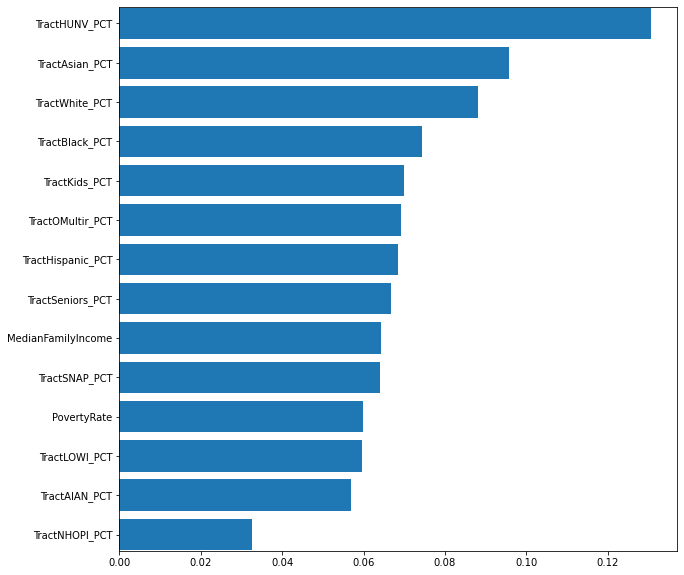

In [34]:
# visualize the feature importance
feature_importances = clf.feature_importances_
# print(features)

features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

plt.show()

In [35]:
# Select important feature for model
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

# Split train/ test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the selected features
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Create and fit model with selected features
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_selected_train_scaled, y_train)

# Predict model
y_pred = clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

C:\Users\meena\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.61      0.46      0.52      5681
           1       0.77      0.86      0.82     12265

    accuracy                           0.74     17946
   macro avg       0.69      0.66      0.67     17946
weighted avg       0.72      0.74      0.72     17946

Training Score: 0.9999814250687272
Testing Score: 0.7353727850217319


In [36]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [5, 10, 20],
    'n_estimators': [50, 100, 200,300]
}

# Create a based model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_clf.fit(X_selected_train_scaled, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=2)

In [37]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

# Predict model
y_pred = grid_clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))

print(f'Training Score: {grid_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {grid_clf.score(X_selected_test_scaled, y_test)}')


{'max_depth': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.67      0.44      0.53      5681
           1       0.78      0.90      0.83     12265

    accuracy                           0.75     17946
   macro avg       0.72      0.67      0.68     17946
weighted avg       0.74      0.75      0.74     17946

Training Score: 0.785533843524779
Testing Score: 0.7544856792600022


# Random Forest Classifier with Second Option (7,708 rows)

In [38]:
# Drop columns that don't contribute to the model
second_food_access_df= second_food_access_df.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
second_food_access_df.head()

,PovertyRate,MedianFamilyIncome,LAhalfand10,lapophalfshare,lalowihalfshare,lakidshalfshare,laseniorshalfshare,lawhitehalfshare,lablackhalfshare,laasianhalfshare,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,8.9,89423.0,0,100.00,18.70,26.45,11.07,87.31,9.02,0.52,...,11.07,87.31,9.02,0.52,0.00,0.88,2.27,1.85,6.33,13.31
1,13.7,84833.0,0,99.00,26.67,27.63,10.06,82.85,13.25,0.58,...,10.16,83.79,13.29,0.58,0.07,0.47,1.79,1.52,5.36,9.53
2,9.8,77865.0,0,97.79,23.42,26.04,10.86,83.16,11.95,0.34,...,11.10,85.20,11.96,0.35,0.05,0.25,2.19,1.69,4.69,16.45
3,22.7,60900.0,1,100.00,38.67,25.92,11.99,76.81,20.84,0.10,...,11.99,76.81,20.84,0.10,0.00,0.62,1.62,1.35,0.83,13.46
4,24.1,49833.0,1,100.00,51.75,22.59,14.85,43.40,54.52,0.06,...,14.85,43.40,54.52,0.06,0.00,0.42,1.60,1.17,20.60,17.61


In [39]:
# Define features and target
X = second_food_access_df.drop('LAhalfand10', axis=1)
y = second_food_access_df['LAhalfand10']

In [40]:
#scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Create and fit the model
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)

# Predict the model
y_pred = clf.predict(X_test_scaled)

# Display scores
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1005
           1       0.92      0.84      0.88       922

    accuracy                           0.89      1927
   macro avg       0.89      0.89      0.89      1927
weighted avg       0.89      0.89      0.89      1927

Training Score: 1.0
Testing Score: 0.8889465490399585


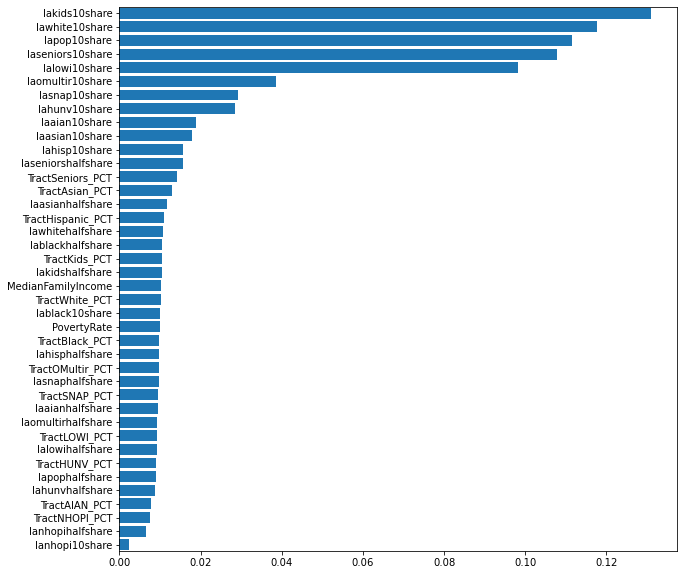

In [42]:
# visualize the feature importance
feature_importances = clf.feature_importances_
# print(features)

features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

plt.show()

In [43]:
# Select important feature for model
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

# Split train/ test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the selected features
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Create and fit model with selected features
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_selected_train_scaled, y_train)

# Predict model
y_pred = clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

C:\Users\meena\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1000
           1       0.91      0.85      0.88       927

    accuracy                           0.89      1927
   macro avg       0.89      0.89      0.89      1927
weighted avg       0.89      0.89      0.89      1927

Training Score: 0.984604739664418
Testing Score: 0.8899844317592112


In [44]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [5, 10, 20],
    'n_estimators': [50, 100, 200,300]
}

# Create a based model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_clf.fit(X_selected_train_scaled, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=2)

In [45]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

# Predict model
y_pred = grid_clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))

print(f'Training Score: {grid_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {grid_clf.score(X_selected_test_scaled, y_test)}')


{'max_depth': 10, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1000
           1       0.91      0.86      0.88       927

    accuracy                           0.89      1927
   macro avg       0.89      0.89      0.89      1927
weighted avg       0.89      0.89      0.89      1927

Training Score: 0.9332295450614081
Testing Score: 0.892579138557343


# Random Forest Classifier with Third Option (67,286 rows)

In [46]:
# Drop columns that don't contribute to the model
third_food_access_df= third_food_access_df.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
third_food_access_df.head()

,PovertyRate,MedianFamilyIncome,LAhalfand10,lapophalfshare,lalowihalfshare,lakidshalfshare,laseniorshalfshare,lawhitehalfshare,lablackhalfshare,laasianhalfshare,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,11.3,81250.0,1,100.00,24.42,26.52,11.56,84.83,11.35,0.73,...,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72
1,17.9,49000.0,1,100.00,44.34,27.93,9.86,40.92,56.08,0.23,...,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00
2,15.0,62609.0,1,84.70,28.79,22.86,10.60,64.53,16.43,0.30,...,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69
3,2.8,70607.0,1,83.24,20.36,19.30,17.48,77.41,3.88,0.34,...,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69
4,15.2,96334.0,1,72.25,15.97,21.45,7.80,58.51,9.29,1.94,...,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30


In [47]:
# Define features and target
X = third_food_access_df.drop('LAhalfand10', axis=1)
y = third_food_access_df['LAhalfand10']

In [48]:
#scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Create and fit the model
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)

# Predict the model
y_pred = clf.predict(X_test_scaled)

# Display scores
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      4620
           1       0.87      0.92      0.89     12202

    accuracy                           0.84     16822
   macro avg       0.81      0.78      0.79     16822
weighted avg       0.84      0.84      0.84     16822

Training Score: 1.0
Testing Score: 0.841814290809654


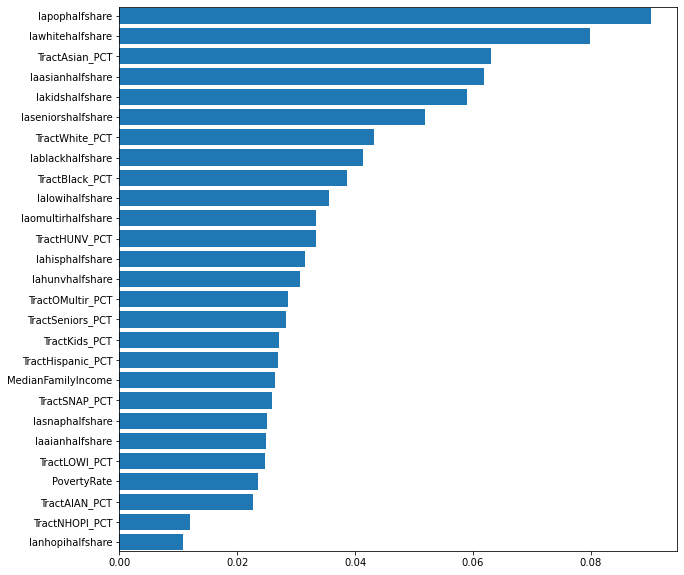

In [50]:
# visualize the feature importance
feature_importances = clf.feature_importances_
# print(features)

features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

plt.show()

In [51]:
# Select important feature for model
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

# Split train/ test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the selected features
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Create and fit model with selected features
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_selected_train_scaled, y_train)

# Predict model
y_pred = clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

C:\Users\meena\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.72      0.60      0.65      4615
           1       0.86      0.91      0.88     12207

    accuracy                           0.83     16822
   macro avg       0.79      0.76      0.77     16822
weighted avg       0.82      0.83      0.82     16822

Training Score: 1.0
Testing Score: 0.8250505290690762


In [52]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [5, 10, 20],
    'n_estimators': [50, 100, 200,300]
}

# Create a based model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_clf.fit(X_selected_train_scaled, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=2)

In [53]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

# Predict model
y_pred = grid_clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))

print(f'Training Score: {grid_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {grid_clf.score(X_selected_test_scaled, y_test)}')


{'max_depth': 10, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.73      0.58      0.65      4615
           1       0.85      0.92      0.88     12207

    accuracy                           0.83     16822
   macro avg       0.79      0.75      0.77     16822
weighted avg       0.82      0.83      0.82     16822

Training Score: 0.8565313887127457
Testing Score: 0.8266555700867911
